# Script para Simulação do MQ para o modelo ARX
Conforme disponibilizado em https://github.com/tassianors/ident_sistemas

In [1]:
%====================================
% Identificacao de sistemas
% Tassiano Neuhaus
% tassianors@gmail.com
% UFRGS
%====================================
close all; clear all;

% LOAD DATA
data_in_4
data_out_4

% Defines
% Number or unknown variables to be determined by this method
n=3;
step_size=1500;
N=0;
j=1;

% Total number of points collected
Ntot=size(input, 1);

while N+step_size < Ntot
    % load partial number of points
    y=output(N+1:N+step_size,1);
    u=input(N+1:N+step_size,1);

    phy=zeros(step_size, n);
    for t=3:step_size
        phy(t, 1)=u(t-2);
        phy(t, 2)=y(t-1);
        phy(t, 3)=y(t-2);
    end

    % make sure, rank(phy) = n
    teta=inv(phy'*phy)*phy'*y;
    % to be used in graphic plotting
    a(j)=teta(1);
    b(j)=-teta(3);
    c(j)=teta(2)-b(j);
    j=j+1;
    N=N+step_size;
end
PN=[a', b'];
printf('Valores médios \n')
ma=mean(a)
sa=std(a);
mb=mean(b)
mc=mean(c)

Valores médios 
ma = 0.020207
mb = 0.8629
mc = 0.9992


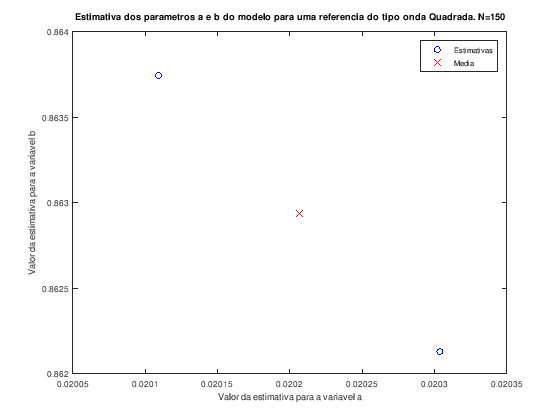

In [2]:
% from here is only to plot the estimated points
graphics_toolkit ("gnuplot");
plot(a, b, 'bo');
set(gcf,'Visible','on')
hold;
plot(ma, mb, 'rx');
hold;
title('Estimativa dos parametros a e b do modelo para uma referencia do tipo onda Quadrada. N=150')
xlabel('Valor da estimativa para a variavel a')
ylabel('Valor da estimativa para a variavel b')
legend('Estimativas', 'Media')